## Importing All Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from datetime import datetime
import time
import warnings
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
warnings.filterwarnings('ignore')
%matplotlib inline

## Importing Dataset i.e. GOOGLE (GOOGL) Stock Price Dataset

In [2]:
df = yf.download('GOOGL', start='2004-08-19', end=datetime.today())

[*********************100%***********************]  1 of 1 completed


In [3]:
df.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
Date,,,,,,
2004-08-19 00:00:00+00:00,2.504808,2.511011,2.604104,2.401401,2.502503,893181924
2004-08-20 00:00:00+00:00,2.703765,2.710460,2.729730,2.515015,2.527778,456686856
2004-08-23 00:00:00+00:00,2.730975,2.737738,2.839840,2.728979,2.771522,365122512
2004-08-24 00:00:00+00:00,2.617892,2.624374,2.792793,2.591842,2.783784,304946748
2004-08-25 00:00:00+00:00,2.646101,2.652653,2.702703,2.599600,2.626627,183772044


In [4]:
df.tail()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
Date,,,,,,
2024-11-18 00:00:00+00:00,175.300003,175.300003,175.440002,172.899994,173.419998,20206600
2024-11-19 00:00:00+00:00,178.119995,178.119995,178.869995,173.559998,173.720001,23434900
2024-11-20 00:00:00+00:00,175.979996,175.979996,177.679993,173.779999,177.339996,18997100
2024-11-21 00:00:00+00:00,167.630005,167.630005,174.130005,163.699997,173.899994,59734400
2024-11-22 00:00:00+00:00,164.759995,164.759995,166.460007,163.899994,165.850006,38560400


In [5]:
df.duplicated().sum()

0

In [6]:
df.columns = df.columns.get_level_values(0)
df

Price,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2004-08-19 00:00:00+00:00,2.504808,2.511011,2.604104,2.401401,2.502503,893181924
2004-08-20 00:00:00+00:00,2.703765,2.710460,2.729730,2.515015,2.527778,456686856
2004-08-23 00:00:00+00:00,2.730975,2.737738,2.839840,2.728979,2.771522,365122512
2004-08-24 00:00:00+00:00,2.617892,2.624374,2.792793,2.591842,2.783784,304946748
2004-08-25 00:00:00+00:00,2.646101,2.652653,2.702703,2.599600,2.626627,183772044
...,...,...,...,...,...,...
2024-11-18 00:00:00+00:00,175.300003,175.300003,175.440002,172.899994,173.419998,20206600
2024-11-19 00:00:00+00:00,178.119995,178.119995,178.869995,173.559998,173.720001,23434900
2024-11-20 00:00:00+00:00,175.979996,175.979996,177.679993,173.779999,177.339996,18997100


In [7]:
df.columns = df.columns.get_level_values(0)

## Copying the dataset for future use

In [8]:
df1 = df.copy()
df1.reset_index(inplace=True)

In [9]:
df.reset_index(drop=True, inplace=True)

### Dropping unwanted column

In [10]:
df.drop(['Adj Close'], axis=1, inplace=True)

### Splitting into features and target

In [11]:
X = df.drop(['Close'], axis=1)
y = df['Close']

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
X = scaler.fit_transform(X)

### Splitting the data into train and test set

In [13]:
## First Method: Splitting data using scikit-learn train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Building using Random Forest Regression



In [14]:
model = XGBRegressor(n_estimators=100, max_depth=10, learning_rate=0.05, random_state=42)
start = time.time()
model.fit(X_train, y_train)
end = time.time()
print('Training Time:', end-start)

Training Time: 2.679175853729248


In [15]:
model.score(X_train, y_train)

0.9998763751202843

In [16]:
predicted = model.predict(X_test)
predicted

array([116.28878 ,  12.24114 ,  12.211728, ...,  11.71742 ,  12.358955,
         7.390816], dtype=float32)

In [17]:
prediction = pd.DataFrame({'Actual': y_test, 'Predicted': predicted})
for a in prediction.index:
    for b in df1.index:
        if a == b:
            prediction['Date'] = df1['Date']
prediction.set_index('Date', inplace=True)
prediction.sort_index(inplace=True)
prediction

,Actual,Predicted
Date,,
2004-08-31 00:00:00+00:00,2.561812,3.050470
2004-09-07 00:00:00+00:00,2.542042,3.050470
2004-09-14 00:00:00+00:00,2.790040,3.094510
2004-09-16 00:00:00+00:00,2.852102,3.050470
2004-09-22 00:00:00+00:00,2.962462,3.540572
...,...,...
2024-10-21 00:00:00+00:00,164.070007,162.178421
2024-11-11 00:00:00+00:00,180.350006,175.464569
2024-11-14 00:00:00+00:00,175.580002,175.708267


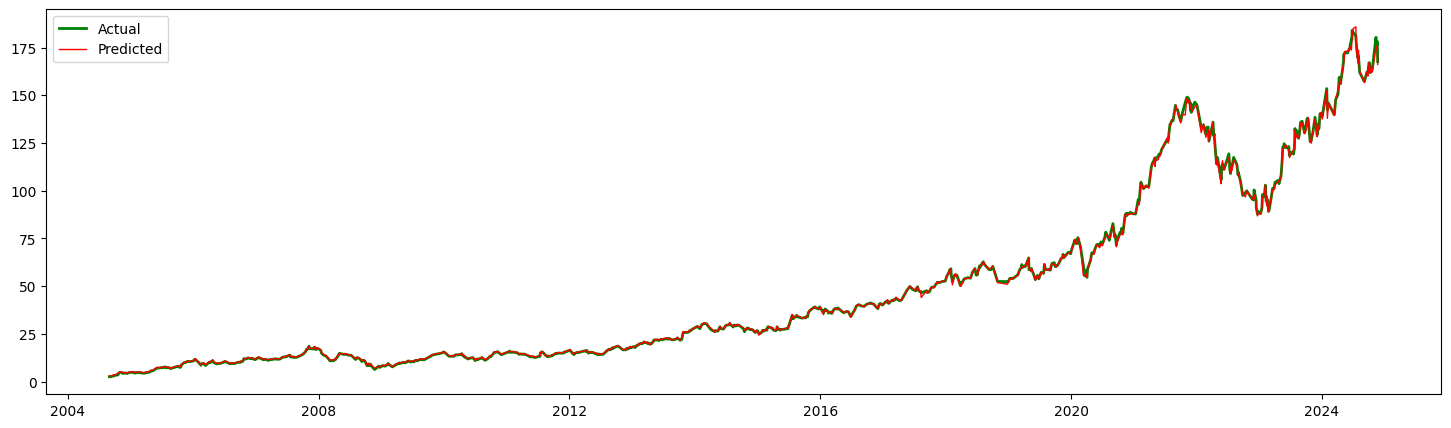

In [18]:
plt.figure(figsize=(18, 5))
plt.plot(prediction.Actual, label='Actual', color='g', linewidth=2)
plt.plot(prediction.Predicted, label='Predicted', color='r', linewidth=1)
plt.legend()
plt.show()

In [19]:
model.predict(scaler.transform([[165.86, 167.65, 165.24, 3621520]]))

array([164.75096], dtype=float32)

In [20]:
df1[df1.Date == '2004-09-01']

Price,Date,Adj Close,Close,High,Low,Open,Volume
9,2004-09-01 00:00:00+00:00,2.502562,2.508759,2.576827,2.494244,2.57007,182765052


In [21]:
model.predict(scaler.transform([[2.57007, 2.576827, 2.494244, 182765052]]))

array([3.0504699], dtype=float32)

## Calculating the Performance Evaluation Metrics

In [22]:
mse = mean_squared_error(y_test, predicted)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predicted)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', mae)

Mean Squared Error: 0.6393226627777006
Root Mean Squared Error: 0.7995765521685216
Mean Absolute Error: 0.44779450769639273


### Here the performance metrics are too much higher so, we have to tune the hyperparameters.

In [23]:
model_params = {
    'n_estimators': [5, 10, 100, 200],
    'max_depth': [10, 20, 30],
    'learning_rate': [0.01, 0.05, 0.1, 0.2]
    }

grid_search = GridSearchCV(XGBRegressor(random_state=42), model_params, cv=5, return_train_score=False)
start = time.time()
grid_search.fit(X_train, y_train)
end = time.time()
print('Training Time:', end-start)

Training Time: 138.5747320652008


In [24]:
grid_search.best_params_

{'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 200}

In [25]:
grid_search.best_score_

0.9997857952982583

In [26]:
grid_search_prediction = grid_search.predict(X_test)
grid_search_prediction

array([116.66866  ,  12.038109 ,  11.957052 , ...,  11.501128 ,
        12.147458 ,   7.1551304], dtype=float32)

In [27]:
prediction = pd.DataFrame({'Actual': y_test, 'Predicted': grid_search_prediction})
for a in prediction.index:
    for b in df1.index:
        if a == b:
            prediction['Date'] = df1['Date']
prediction.set_index('Date', inplace=True)
prediction.sort_index(inplace=True)
prediction

,Actual,Predicted
Date,,
2004-08-31 00:00:00+00:00,2.561812,2.576094
2004-09-07 00:00:00+00:00,2.542042,2.633937
2004-09-14 00:00:00+00:00,2.790040,2.784160
2004-09-16 00:00:00+00:00,2.852102,2.609767
2004-09-22 00:00:00+00:00,2.962462,3.030231
...,...,...
2024-10-21 00:00:00+00:00,164.070007,163.707260
2024-11-11 00:00:00+00:00,180.350006,176.330948
2024-11-14 00:00:00+00:00,175.580002,177.279388


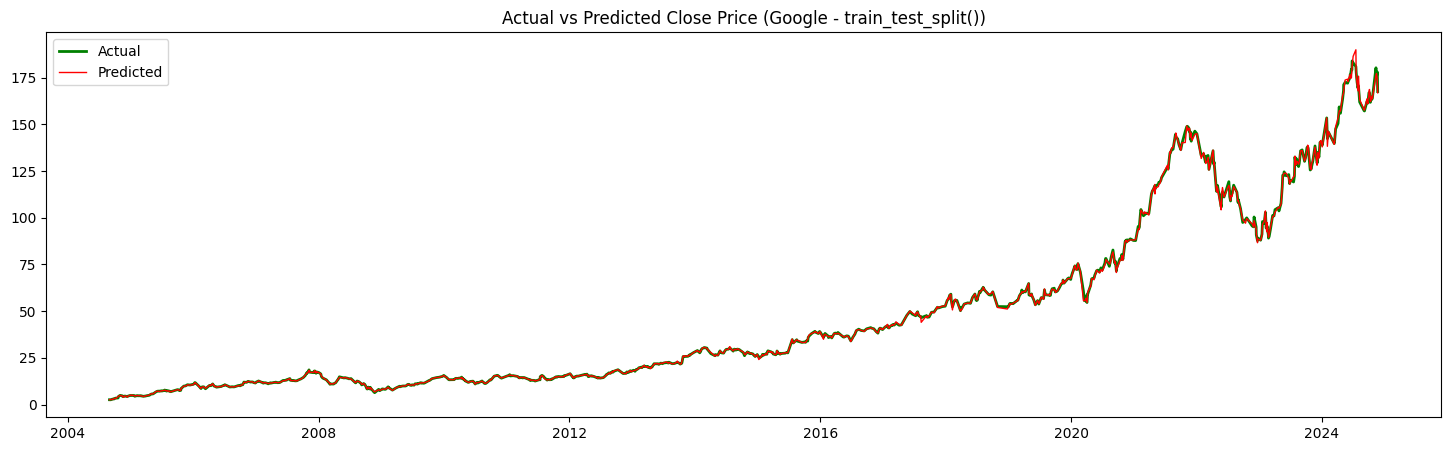

In [28]:
plt.figure(figsize=(18, 5))
plt.plot(prediction.Actual, label='Actual', color='g', linewidth=2)
plt.plot(prediction.Predicted, label='Predicted', color='r', linewidth=1)
plt.title('Actual vs Predicted Close Price (Google - train_test_split())')
plt.legend()
plt.show()

### Performance Evaluation Metrics after Hyperparameter Tuning

In [29]:
mse = mean_squared_error(y_test, grid_search_prediction)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, grid_search_prediction)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', mae)

Mean Squared Error: 0.6147843492611136
Root Mean Squared Error: 0.7840818511234102
Mean Absolute Error: 0.37410561228125383
